In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Read data to python environment**

In [146]:
data = pd.read_csv('/content/titanic_dataset .csv')

In [147]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
data.shape

(891, 12)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


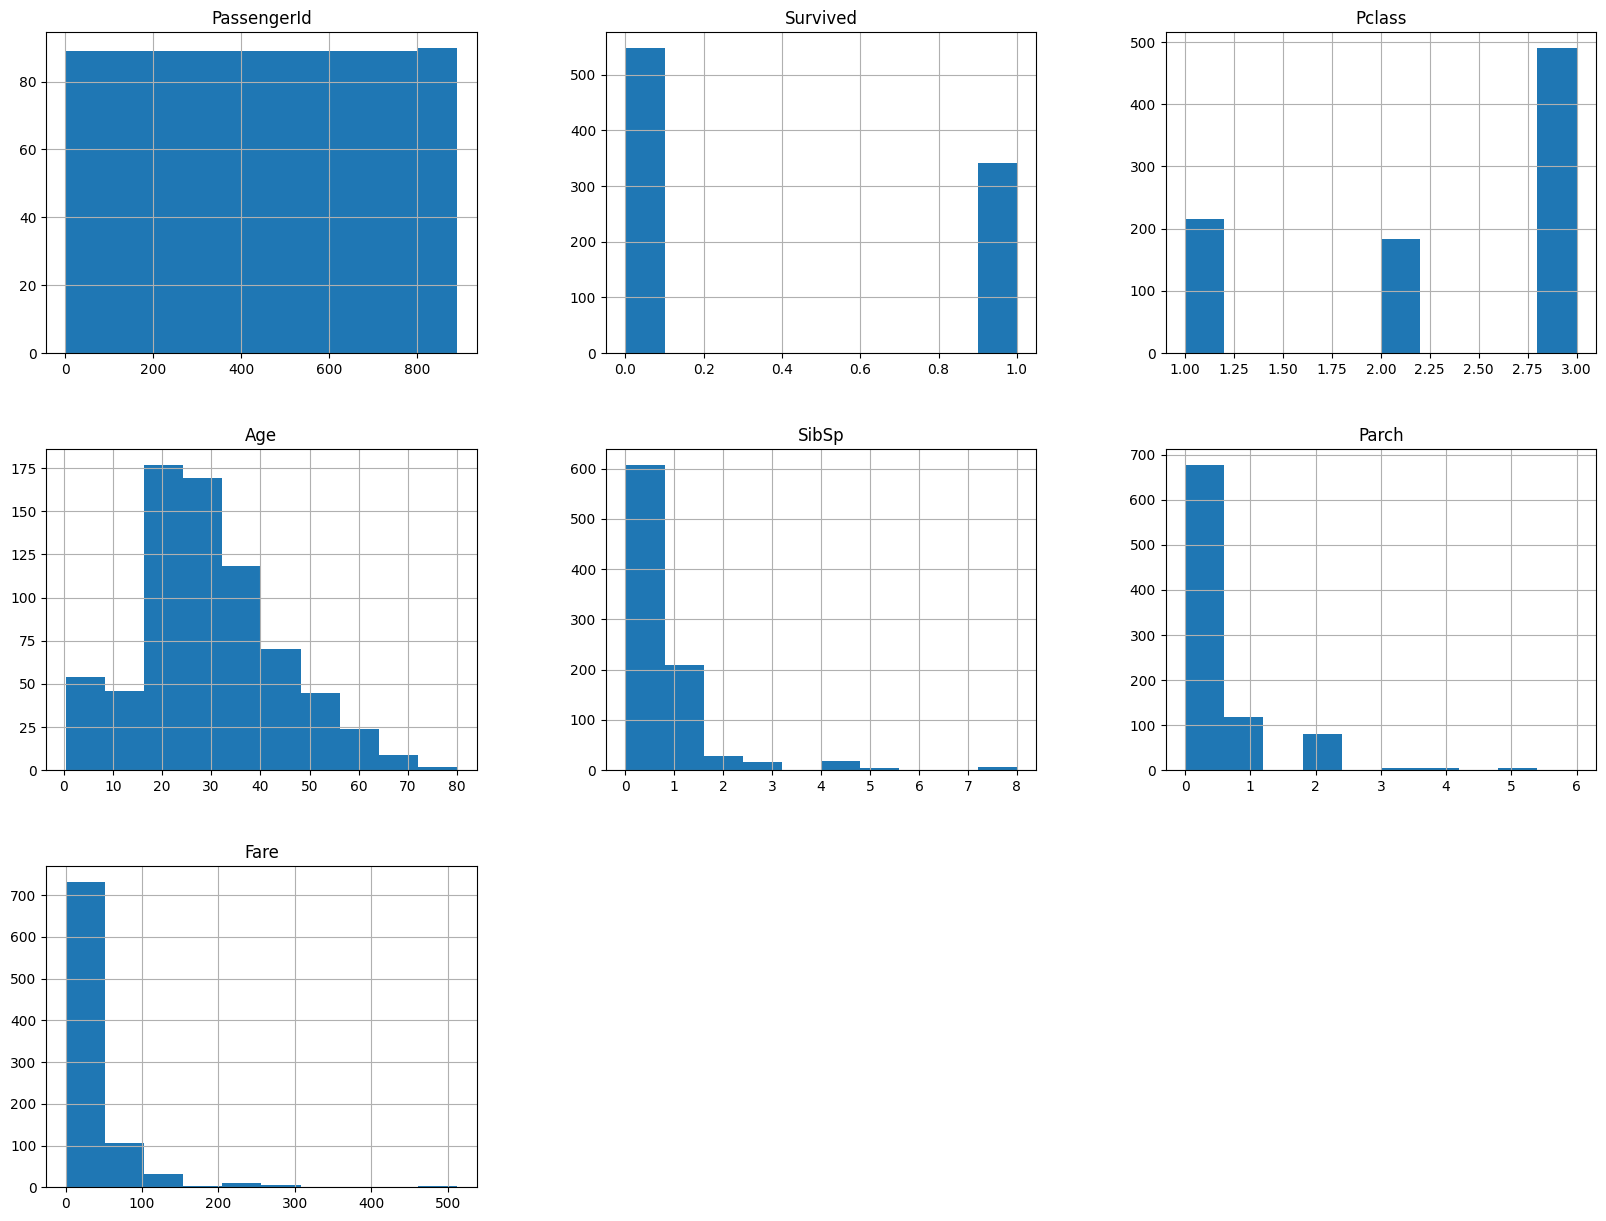

In [131]:
#displaying the histograms to view the distribution of data
data.hist(figsize=(20,15))
plt.show()

**Fill in the missing values**

In [149]:
# there are missing values in Age, Cabin and Embarked
# 687 entries are mising in the Cabin column. Thus, it will be appropriate to drop Cabin column
data.drop('Cabin',axis = 1,inplace = True)

In [150]:
# the missing entries of Age are filled with the median values as it is skewed data
data['Age'] = data['Age'].fillna(data['Age'].median())

In [151]:
# the missing entries of Embarked are filled with the mode values
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [152]:
#Passenger Id , Passenger Name, Ticket,Fare  are not affecting our analysis. So, drop these columns
data.drop(['PassengerId','Name','Ticket','Fare'],axis = 1,inplace = True)

In [153]:
#Create a new column Age group and classify the ages into group
def AgeGroup(n):
  if n in range (0,18):
    return 0
  #elif n in range(11,18):
    #return 1
  elif n in range(18,22):
    return 1
  elif n in range(22,27):
    return 2
  elif n in range(27,29):
    return 3
  elif n in range(29,40):
    return 4
  elif n in range(40,70):
    return 5
  else:
    return 5

In [154]:
data['Age Group'] = data['Age'].apply(lambda x:AgeGroup(x))

In [155]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age Group
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,4
2,1,3,female,26.0,0,0,S,2
3,1,1,female,35.0,1,0,S,4
4,0,3,male,35.0,0,0,S,4


In [156]:
data['Age Group'].value_counts()

3    220
5    182
4    181
2    113
0    105
1     90
Name: Age Group, dtype: int64

**Label Encoding**

In [157]:
from sklearn.preprocessing import LabelEncoder

In [158]:
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])
data['Sex'] = le.fit_transform(data['Sex'])

In [159]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age Group
0,0,3,1,22.0,1,0,2,2
1,1,1,0,38.0,1,0,0,4
2,1,3,0,26.0,0,0,2,2
3,1,1,0,35.0,1,0,2,4
4,0,3,1,35.0,0,0,2,4


**Check for outliers**

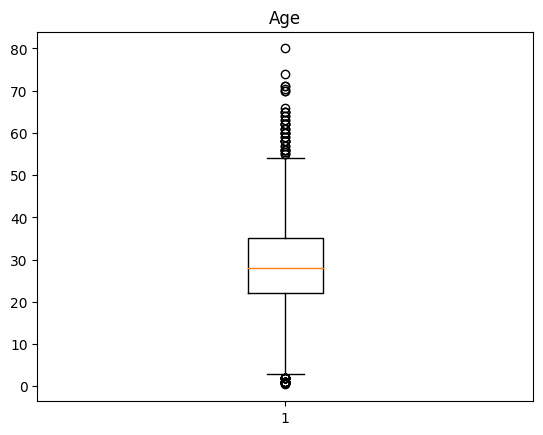

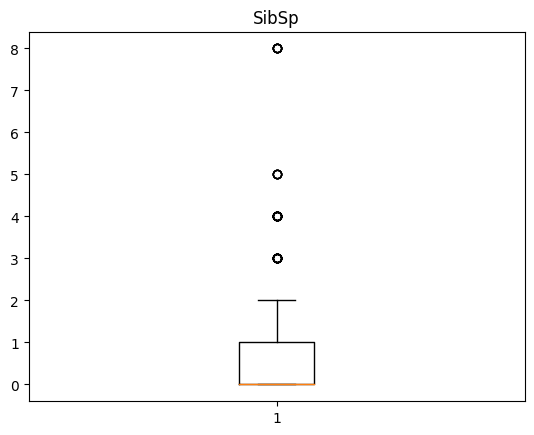

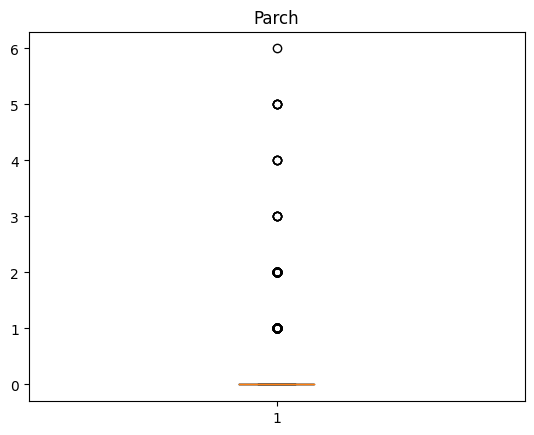

In [14]:
num_col = ['Age','SibSp','Parch']
for i in num_col:
  plt.boxplot(data[i])
  plt.title(i)
  plt.show()

Most of the outliers in the columns seem to be relevant, so not handling outliers

Droping Age column so that we do not need to scale.

In [160]:
data.drop('Age',axis =1,inplace = True)

In [161]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group
0,0,3,1,1,0,2,2
1,1,1,0,1,0,0,4
2,1,3,0,0,0,2,2
3,1,1,0,1,0,2,4
4,0,3,1,0,0,2,4


**Test,Train and Split**

Target will be to find if the Passenger survived or not

In [162]:
from sklearn.model_selection import train_test_split
y=data['Survived']

In [163]:
X=data.drop(['Survived'],axis=1)

In [164]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age Group
0,3,1,1,0,2,2
1,1,0,1,0,0,4
2,3,0,0,0,2,2
3,1,0,1,0,2,4
4,3,1,0,0,2,4


In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

**Knn**

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [167]:
metric_k = []
neighbors = np.arange(3,15)

In [168]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  model_knn = classifier.fit(X_train,y_train)
  y_pred_knn = model_knn.predict(X_test)
  acc= accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [169]:
metric_k

[0.7877094972067039,
 0.7821229050279329,
 0.7988826815642458,
 0.8100558659217877,
 0.7988826815642458,
 0.8156424581005587,
 0.7988826815642458,
 0.8044692737430168,
 0.776536312849162,
 0.8044692737430168,
 0.7877094972067039,
 0.7877094972067039]

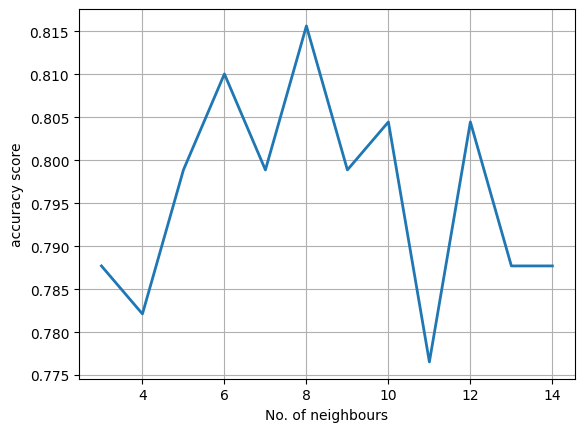

In [170]:
plt.plot(neighbors,metric_k,linewidth=2)
plt.xlabel('No. of neighbours')
plt.ylabel('accuracy score')
plt.grid()

In [171]:
classifier =KNeighborsClassifier(n_neighbors=8,metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [172]:
accuracy_score(y_test,y_pred_knn)

0.8156424581005587

**K Fold**

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [174]:
k = KFold(10)

In [175]:
k

KFold(n_splits=10, random_state=None, shuffle=False)

In [176]:
cv_result = cross_val_score(model_knn,X,y,cv=k)

In [177]:
cv_result

array([0.74444444, 0.80898876, 0.7752809 , 0.79775281, 0.85393258,
       0.79775281, 0.78651685, 0.71910112, 0.82022472, 0.86516854])

In [178]:
np.mean(cv_result)

0.796916354556804

**Stratified K-Fold**

In [179]:
sk =StratifiedKFold(10)
sk_result = cross_val_score(model_knn,X,y,cv=sk)

In [180]:
sk_result

array([0.77777778, 0.79775281, 0.76404494, 0.83146067, 0.87640449,
       0.80898876, 0.82022472, 0.74157303, 0.79775281, 0.86516854])

In [181]:
np.mean(sk_result)

0.8081148564294631

**SVM**

In [182]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='linear')
model_svc = svc_clf.fit(X_train,y_train)
predict_svc = model_svc.predict(X_test)

In [183]:
predict_svc

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [184]:
acc_score= accuracy_score(y_test,predict_svc)
acc_score

0.7821229050279329

**K Fold**

In [185]:
k_svm = KFold(10)

In [186]:
cv_result_svm = cross_val_score(model_svc,X,y,cv=k_svm)

In [187]:
np.mean(cv_result_svm)

0.786729088639201

**Stratified K-Fold**

In [188]:
sk_svm =StratifiedKFold(10)
sk_result_svm = cross_val_score(model_svc,X,y,cv=sk_svm)

In [189]:
np.mean(sk_result_svm)

0.786729088639201